<a href="https://colab.research.google.com/github/Caylie-Mackay/Data_Tech_Pyton_Final/blob/main/Final_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
#backup dataset
#df = pd.read_csv('/content/movies_dataset.csv')

In [188]:
df = pd.read_csv('https://raw.githubusercontent.com/Caylie-Mackay/Raw_CSV/refs/heads/main/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [190]:
#This dataset has a couple of rows of duplicate values and some missing values
#There are a couple strings mostly in the education column that have multiple spellings for the same input

In [191]:
df = df.replace('phD', 'PhD').replace('Master\'s', 'Master\'s Degree').replace('Bachelor\'s', 'Bachelor\'s Degree')

In [192]:
df= (df
     .drop_duplicates()#removing any duplicates
     .dropna()#removing any rows with missing values
)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [193]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,767
Master's Degree,568
PhD,341
High School,110


In [194]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer Manager,127
Full Stack Engineer,122
Senior Software Engineer,96
Senior Project Engineer,95
Back end Developer,81
...,...
Junior Research Scientist,1
Senior Product Development Manager,1
Junior Social Media Specialist,1


In [195]:
df['Gender'].value_counts()

,count
Gender,
Male,966
Female,813
Other,7


In [196]:
df[df['Salary'] < 20000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's Degree,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


In [197]:
'''using the cell above I have identified 4 outliers that dont look quite right.
Seeing as they have higher education levels and expirience levels I can assume a couple 0's were missed when they input thier salary.
I will correct the inputs by multiplying the salary by 100 to make it make sense in the data'''

"using the cell above I have identified 4 outliers that dont look quite right.\nSeeing as they have higher education levels and expirience levels I can assume a couple 0's were missed when they input thier salary.\nI will correct the inputs by multiplying the salary by 100 to make it make sense in the data"

In [198]:
df.loc[df['Salary'] < 20000, 'Salary'] = df['Salary'] * 100

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1786 non-null   float64
 1   Gender               1786 non-null   object 
 2   Education Level      1786 non-null   object 
 3   Job Title            1786 non-null   object 
 4   Years of Experience  1786 non-null   float64
 5   Salary               1786 non-null   float64
dtypes: float64(3), object(3)
memory usage: 162.2+ KB


In [200]:
df.describe()

,Age,Years of Experience,Salary
count,1786.000000,1786.000000,1786.000000
mean,35.142217,9.159015,113329.735722
std,8.214760,6.845753,51402.813359
min,21.000000,0.000000,25000.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [201]:
df[df['Gender']=='Other']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2385,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
2406,37.0,Other,Master's Degree,Full Stack Engineer,14.0,161393.0
2448,31.0,Other,High School,Back end Developer,8.0,104127.0
2454,23.0,Other,High School,Front end Developer,2.0,62852.0
2554,54.0,Other,High School,Senior Software Engineer,29.0,158254.0
2800,54.0,Other,High School,Senior Software Engineer,29.0,158966.0


In [202]:
Gender_salary = (df
 .groupby('Gender')
 .agg({'Salary':'mean'})
 .reset_index()
 )
Gender_salary
#This shows the relationship between gender and salary. Male participents make more on average then female participents.
#The other category is more skewed since it is a smaller sample size with highly experienced individuals.

,Gender,Salary
0,Female,107493.131611
1,Male,118151.406832
2,Other,125819.000000


In [203]:
Education_salary = (df
 .groupby(['Education Level'])
 .agg({'Salary':'mean'})
 .reset_index()
 .sort_values('Salary', ascending=False)
)
Education_salary
#This shows the relationship between education level and salary. The higher the educfation level the higher the salary.

,Education Level,Salary
3,PhD,161110.618768
2,Master's Degree,127432.806338
0,Bachelor's Degree,91379.915254
1,High School,45435.981818


In [204]:
Salary_by_gender_education = (df
 .groupby(['Gender', 'Education Level'])
 .agg({'Salary':'mean'})
 .reset_index()
)
Salary_by_gender_education
# These statistics show how both Gender and Education level factr into Salary. Ususallly the higher the education level the higher the salary.
#It also appears that the accerage salary for male participants is slightly higher then female participents with the same education level.

,Gender,Education Level,Salary
0,Female,Bachelor's Degree,85223.746177
1,Female,High School,38380.078431
2,Female,Master's Degree,121537.589744
3,Female,PhD,159728.772358
4,Male,Bachelor's Degree,95955.068182
5,Male,High School,43796.867925
6,Male,Master's Degree,134512.600000
7,Male,PhD,161890.284404
8,Other,High School,119890.000000
9,Other,Master's Degree,161393.000000


In [205]:
df.filter(['Age','Years of Experience','Salary']).corr()
# This corelation analysis shows strong correlation between Salary and Years of Experience. This relationship is stronger then Salary and Age.
#There is also a strong correlation between Age and Years of Experience though that is to be expected.

,Age,Years of Experience,Salary
Age,1.000000,0.936263,0.767444
Years of Experience,0.936263,1.000000,0.819371
Salary,0.767444,0.819371,1.000000


<Figure size 1000x1500 with 0 Axes>

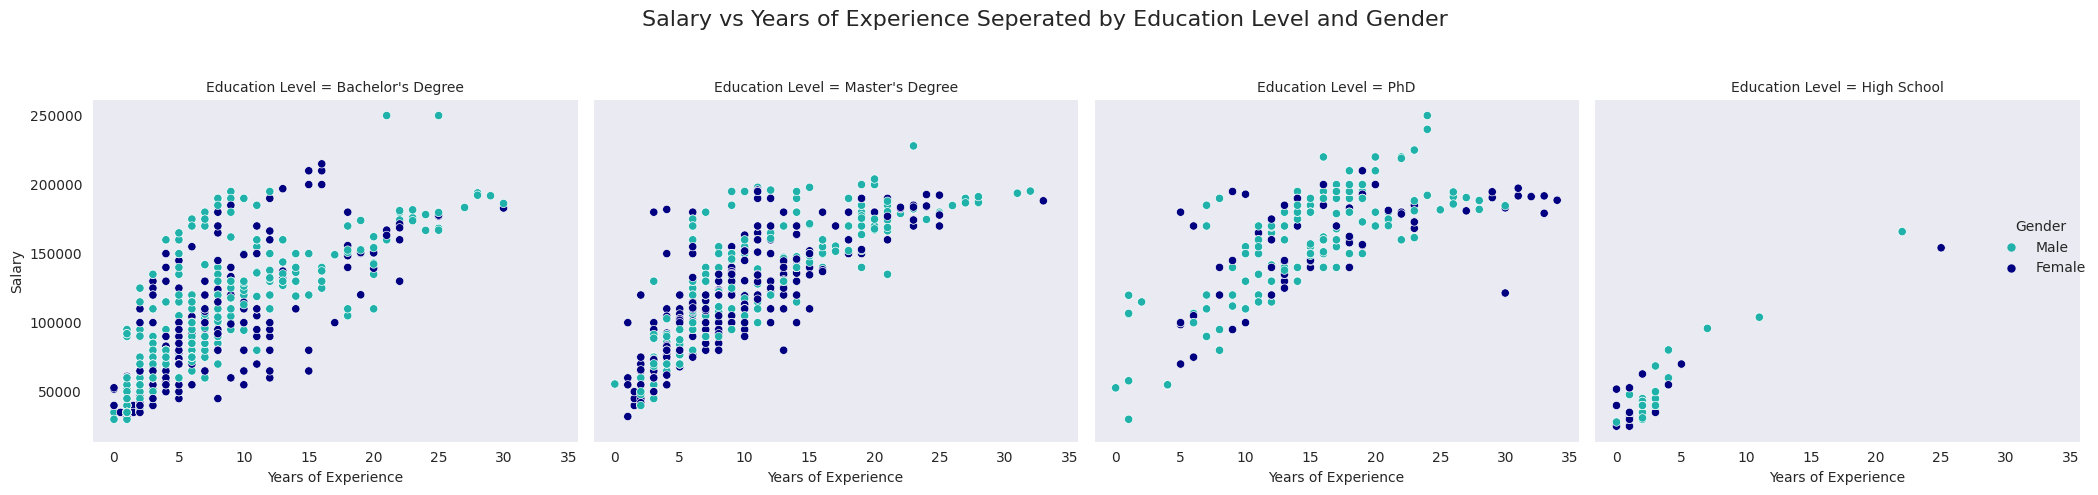

In [228]:
plt.figure(figsize=(10,15))
other = df[df['Gender']=='Other']
male_female = df.drop(other.index)
sns.set_style('dark')
relplot= sns.relplot(data=male_female, x='Years of Experience',y='Salary', col='Education Level', hue='Gender', palette=('#20B2AA','#000080'))

relplot.fig.suptitle("Salary vs Years of Experience Seperated by Education Level and Gender", fontsize=16)

# These adjust spacing
relplot.fig.tight_layout()
relplot.fig.subplots_adjust(top=0.80)

/tmp/ipython-input-3850690316.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=male_female, x='Gender', y='Years of Experience', palette=('#20B2AA','#000080'))


Text(0.5, 1.0, 'Years of Experience by Gender')

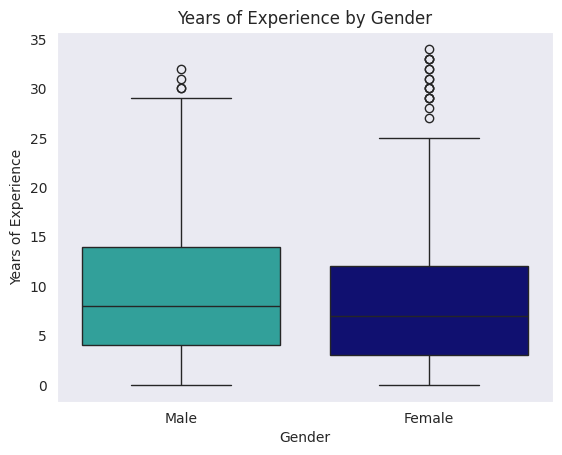

In [217]:
sns.boxplot(data=male_female, x='Gender', y='Years of Experience', palette=('#20B2AA','#000080'))
plt.title('Years of Experience by Gender')

Text(0.5, 1.0, 'Distrobution of Salaries by Education Level')

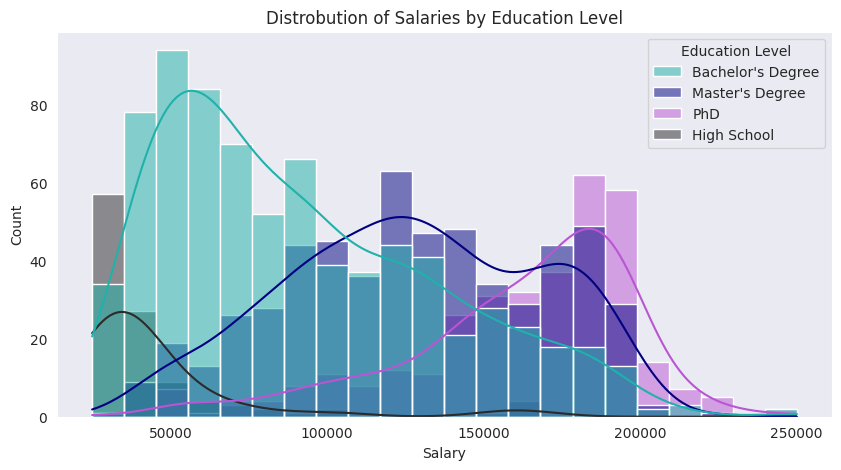

In [216]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Salary',binwidth=10000,hue='Education Level', kde=True, palette=('#20B2AA','#000080','#ba55d3','#2B2B2B'))
plt.title('Distrobution of Salaries by Education Level')

In [209]:
Count_of_jobs= df['Job Title'].value_counts().reset_index()
Top_10_jobs = Count_of_jobs.head(10)
Top_10_jobs

,Job Title,count
0,Software Engineer Manager,127
1,Full Stack Engineer,122
2,Senior Software Engineer,96
3,Senior Project Engineer,95
4,Back end Developer,81
5,Data Scientist,80
6,Software Engineer,78
7,Front end Developer,71
8,Marketing Manager,55
9,Product Manager,53


Text(0.5, 1.0, 'Top 10 Job Titles')

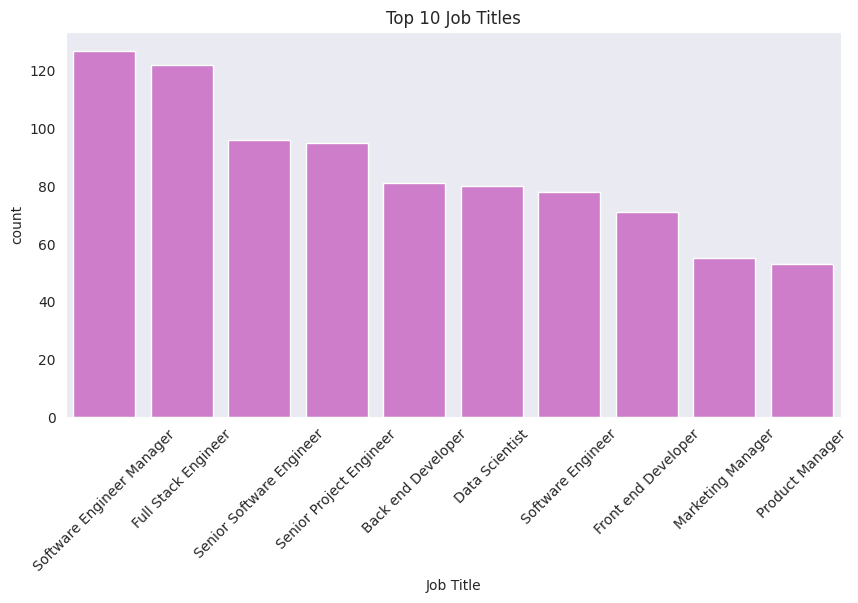

In [215]:
plt.figure(figsize=(10,5))
sns.barplot(data=Top_10_jobs,x='Job Title', y='count', color='orchid')
plt.xticks(rotation=45)
plt.title('Top 10 Job Titles')